<a href="https://colab.research.google.com/github/biancaitalia/BME3053C-Spring-2025/blob/main/Homework_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
from scipy.signal import find_peaks


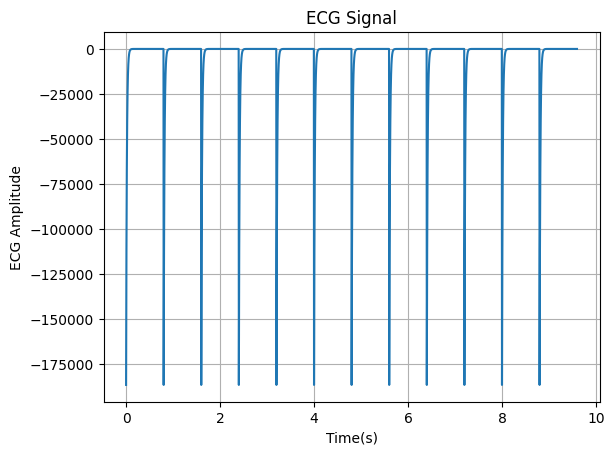

In [25]:
from typing_extensions import dataclass_transform
def generate_ecg_data(duration, sampling_rate=250):
  def generate_ecg_pulse(duration, sampling_rate):
    t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
    # P wave
    p_wave = 0.15 * np.sin(2 * np.ppi * 1.5 * t) * np.exp(-((t - 0.1) ** 2) / 0.005)
    # QRS complex
    qrs_complex = np.zeros_like(t)
    qrs_complex[(t > 0.2) & (t < 0.25)] = -0.3
    qrs_complex[(t > 0.25) & (t < 0.3)] = 1.0
    qrs_complex[(t > 0.3) & (t < 0.35)] = -0.2
    # T wave
    t_wave = 0.3 * np.sin(2 * np.pi * 0.75 * (t - 0.45)) * np.exp(-((t - 0.45) ** 2) / 0.015)
    # Combine all components
    pulse = p_wave + qrs_complex + t_wave
    # Add high-frequency noise to the pulse
    high_freq_noise = 0.05 * np.sin(2 * np.pi * 50 * t)
    pulse += high_freq_noise
    return pulse
    #Generate a single ECG pulse
    single_pulse = generate_ecg_pulse(0.8, sampling_rate)
    #Repeat the pulse to create a longer ECG signal
    num_pulse = int(duration / 0.8)
    ecg_date = np.tile(single_pulse, num_pulses)
    #Add more noise to make it more realistic
    noise = np.random.normal(0, 0.05, len(eng_data))
    # Increaed noise amplitude
    ecg_data += noise
    # Add baseline wander
    t = np.linspace(0, duration, len(ecg_data), endpoint=False)
    baseline_wander = 0.1 * np.sin(2 * np.pi * 0.1 * t)
    ecg_ddata += baseline_wander
    #Add power line interference
    power_line_interference = 0.05 * np.sin(2 * np.pi * 60 * t)
    # 60 Hz interference
    ecg_data += power_line_interference
    #Ensure the length of ecg_length matches the desired duration
    ecg_data = ecg_data[:int(duration * sampling_rate)]
    return ecg_data

ecg_data = generate_ecg_data(10, 250)
def generate_ecg_data(duration, sampling_rate=250):
  def generate_ecg_pulse(duration, sampling_rate):
    t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
    #P wave
    p_wave = 0.15 * np.sin(2 * np.pi * 1.5 * t) * np.exp(-((t - 0.1) ** 2) / 0.005)
    # QRS complex
    qrs_complex = np.zeros_like(t)
    qrs_complex[(t > 0.2) & (t < 0.25)] = -0.3
    qrs_complex[(t > 0.25) & (t < 0.3)] = 1.0
    qrs_complex[(t > 0.3) & (t < 0.35)] = -0.2
    # T wave
    t_wave = 0.3 * np.sin(2 * np.pi * 0.75 * (t - 0.45)) * np.exp(-((t - 0.45 ** 2)/ 0.015))
    # Combine all components
    pulse = p_wave + qrs_complex + t_wave
    # Add high-frequency noise to the pulse
    high_freq_noise = 0.05 * np.sin(2* np.pi * 50 * t)
    pulse += high_freq_noise
    return pulse

  # Generate a single ECG pulse
  single_pulse = generate_ecg_pulse(0.8, sampling_rate)
  #Repeat the pulse to create a longer ECG signal
  num_pulses = int(duration / 0.8)
  ecg_data = np.tile(single_pulse, num_pulses)
  # Add more noise to make it more realistic
  noise = np.random.normal(0, 0.05, len(ecg_data))
  # Increased noise amplitude
  ecg_data += noise
  # Add baseline wander
  t = np.linspace(0, duration, len(ecg_data), endpoint=False)
  baseline_wander = 0.1 * np.sin(2 * np.pi * 0.1 * t)
  ecg_data += baseline_wander
  #Add power line interference
  power_line_interference = 0.05 * np.sin(2 * np.pi * 60 * t) # 60 Hz interference
  ecg_data += power_line_interference
  # Ensure the length of ecg_data matches the desired duration
  ecg_data = ecg_data[:int(duration * sampling_rate)]
  time = np.arange(len(ecg_data)) / sampling_rate # Time

  return time, ecg_data

time, ecg_data = generate_ecg_data(10,250)


plt.xlabel("Time(s)")
plt.ylabel("ECG Amplitude")
plt.grid(True)
plt.title("ECG Signal")
plt.plot(time, ecg_data)



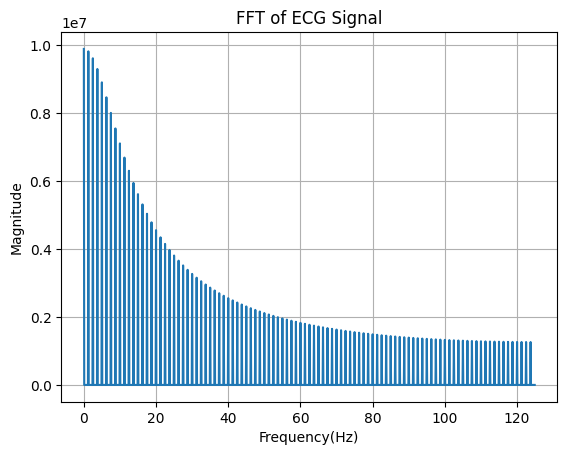

In [30]:
fft_result = fft(ecg_data)
fft_freq = np.fft.fftfreq(len(ecg_data), 1/250)
positive_freq = fft_freq[:len(fft_freq)//2]
pos_magnitude = np.abs(fft_result)[:len(fft_freq)//2]

plt.plot(positive_freq, pos_magnitude)
plt.xlabel("Frequency(Hz)")
plt.ylabel("Magnitude")
plt.title("FFT of ECG Signal")
plt.grid(True)

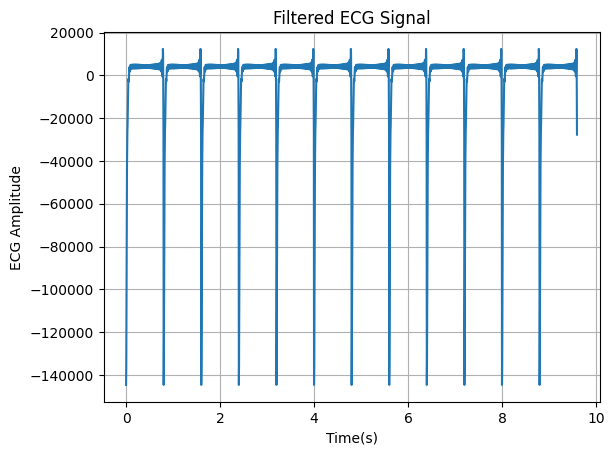

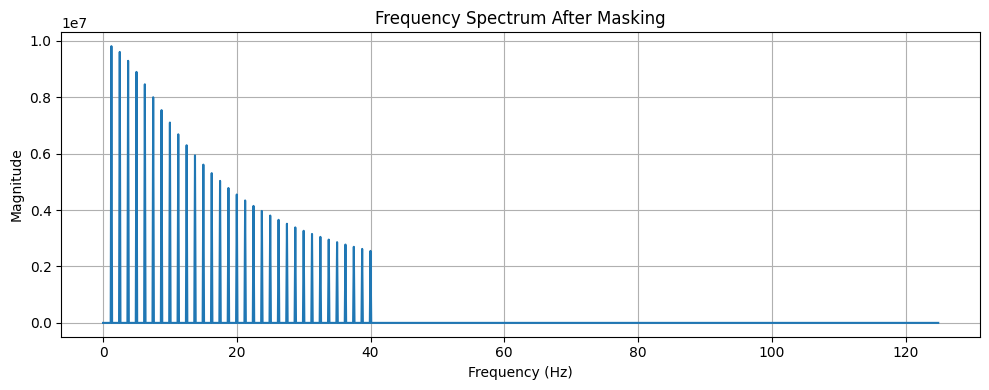

In [23]:
bandpass_mask = (np.abs(frequencies) >= 0.5) & (np.abs(frequencies <= 40))
filtered_fft = np.zeros_like(fft_result)
filtered_fft[bandpass_mask] = fft_result[bandpass_mask]
filtered_ecg = np.real(ifft(filtered_fft))

plt.plot(time, filtered_ecg)
plt.xlabel("Time(s)")
plt.ylabel("ECG Amplitude")
plt.title("Filtered ECG Signal")
plt.grid(True)

magnitude_filtered = np.abs(filtered_fft)
plt.figure(figsize=(10, 4))
plt.plot(frequencies[:len(frequencies)//2], magnitude_filtered[:len(frequencies)//2])
plt.title("Frequency Spectrum After Masking")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.tight_layout()
plt.show()

Heart Rate: 76.4980875478113 beats per minute
Average RR Interval: 0.7843333333333334 seconds


Text(0.5, 1.0, 'Filtered ECG Signal with R Peaks')

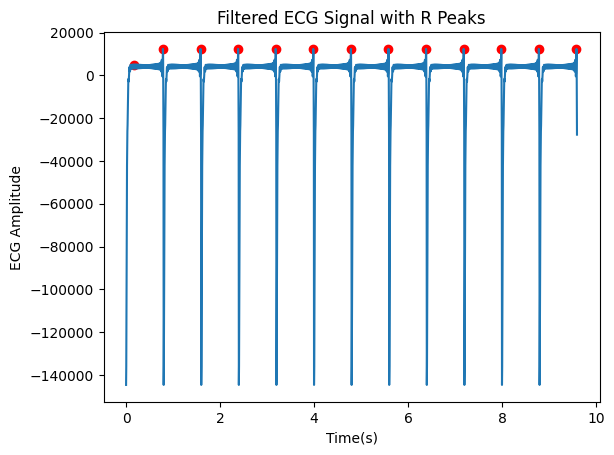

In [27]:
peaks, _ = find_peaks(filtered_ecg, height = 0.5, distance = 250 * 0.4)
peak_times = time[peaks]
rr_intervals = np.diff(peak_times)

average_rr = np.mean(rr_intervals)
heart_rate = 60 / average_rr

print("Heart Rate:", heart_rate, "beats per minute")
print("Average RR Interval:", average_rr, "seconds")

plt.plot(time, filtered_ecg, label="Filtered ECG")
plt.scatter(peak_times, filtered_ecg[peaks], color="red", label="R Peaks")
plt.xlabel("Time(s)")
plt.ylabel("ECG Amplitude")
plt.title("Filtered ECG Signal with R Peaks")

In this assignment, we were given code to create an ecg signal. From the given code, we were given tasks to eventually calculate the beats per minute. First, plotting the signal in respect to time, we see that the signal is negative. Then we had to calculate the fourier transform. Doing this allows us to visualize the decrease in magnitude of the signal as frequency increases. Next, I applied a bandpass filter to the signal. This only allows the plot to show frequencies with values between 0.5 and 40 Hz. I also plotted the frequency spectrum to show how after 40 Hz, there is no outputted signal. Finally, I detected all peaks with red dots and calculated the beats per minute. Along with this, the time between RR intervals was also calculated.

The results are:
	Beats per minute: 76.49
	Average RR interval: 0.784 seconds
